RED NEURONAL

---

Permite calcular la dosis de anticoagulante en función del nivel
de INR encontrado en la sangre en paciente con TACO (Anticoagulante).
El paciente es de sexo femenino de 54 años, posee un recambio valvular aórtico realizado a los 12 años de edad. Desde el punto de vista médico, es necesario controlar periodicamente los niveles de coagulación de la sangre, para de esta forma no obstruir de coagulos la válcula cardíaca artificial que posee el paciente. Para este efecto, las variables a utilizar en este análisis son:
*   INR (Prueba de tiempo de protrombina): el que mide el tiempo que tarda en formarse un coágulo en una muestra de sangre. Según datos históricos, su rango es de 2,39 a 5,04. Mientras que su rango esperado óptimo es de 2,5 a 4,5.
*   DOSIS: Corresponde al anticoagulante suministrado al paciente, cuya función es regular los niveles de coagulación del paciente. Según datos históricos, su rango es desde 9 a 12 mg/semana.




In [105]:
# Se importan las librerias para realizar la red neuronal, que permitirá obtener la dosis de anticoagulante para el paciente
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [106]:
# Se crean dos variables, INR y dosis. Ambos datos, se obtienen de registros históricos aportados por el paciente.
# Por cada nivel de INR, se aplica una determinada dosis semanal de anticoagulante, el que se obtiene de muestras de sangre.
# Estas muestras de sangre se realizan aproximadamente cada 1 a 2 meses. Por lo tanto, cada registro de la serie posee un tiempo promedio histórico de 1.5 meses.
INR = np.array([2.39, 3.07, 2.85, 4.3, 4.3, 2.87, 3.05, 2.38, 3.56, 3.3, 4.49, 3.18, 3.67, 3.18, 3.28, 2.5, 5.04, 3.26], dtype=float)
dosis = np.array([11, 10, 10, 9.33, 10.5, 12, 11, 11, 10, 10, 10, 11, 11, 11, 11, 11, 10, 11], dtype=float)


In [107]:
# Para la creación de la red neuronal, creamos dos variables; capa y modelo. Estas variables se configuran con keras.
capa = tf.keras.layers.Dense(units=1, input_shape=[1])
modelo = tf.keras.Sequential([capa])

In [108]:
# Usando el algoritmo de ADAM, se compila el modelo a través del MSE.
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss="mean_squared_error"
)

In [109]:
# El entranamiento de la red neuronal, se realiza con 2000 repeticiciones.
print("Comenzando entrenamiento de red neuronal...")
historial = modelo.fit(INR, dosis, epochs=2000, verbose=False)
print("¡Modelo entrenado satisfactoriamente!")

Comenzando entrenamiento de red neuronal...
¡Modelo entrenado satisfactoriamente!


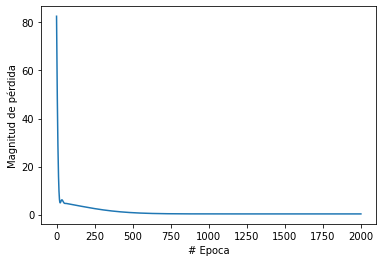

In [110]:
 # Usando la librería MATPLOTLIB, se aprecia que las 2000 repeticiones no eran necesarias, sólo bastaba con 600 aprox.
 plt.xlabel("# Epoca")
 plt.ylabel("Magnitud de pérdida")
 plt.plot(historial.history["loss"])

In [111]:
# Una vez entrenada la red neuronal con los datos históricos, se realiza una predicción para el dato dado.
# El valor de la variable RESULTADO, corresponde a la dosis semanal en miligramos (mg) para el paciente, el que debe ser dividido en 7 días.
print("Se realiza una predicción considerando los datos históricos del paciente y la dosis semanal suministrada en cada toma de muestra sanguinea")
resultado = modelo.predict([3.26])
print("El resultado es para el INR indicado es de " + str(resultado) + "dosis semanal, la que debe ser dividida en 7 días.")

Se realiza una predicción considerando los datos históricos del paciente y la dosis semanal suministrada en cada toma de muestra sanguinea
El resultado es para el INR indicado es de [[10.655775]]dosis semanal, la que debe ser dividida en 7 días.


CONCLUSIÓN

---
Se realiza una predicción para un INR de 3.26, cuyo resultado obtenido a través de la red neuronal entrenada es de 10,65mg/semanal, aproximadamente 1.52mg/diarios. El modelo debe validarse probando con los datos históricos de otro paciente sometido a tratamiento anticoagulante (TACO). Para el entrenamiento de la red neuronal, se usaron 18 registros, por lo que para una mayor precisión, se sugiere entrenar con una mayor cantidad de datos.